<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/Catalogo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import scipy.special as sp
from scipy.stats import beta
from scipy.stats import gamma
from scipy.special import gamma as gamma_func
from scipy.stats import invgamma
from scipy.stats import beta as beta_dist
from scipy.stats import t
from scipy.stats import norm

In [2]:
def fun_dis_Poisson(lambd, graficar=True):
    if lambd <= 0:
        raise ValueError("El parámetro λ debe ser mayor que 0.")

    # f.m.p.
    def fmp(x):
        x = np.floor(x)
        return np.where(x >= 0, np.exp(-lambd) * lambd**x / sp.factorial(x), 0)

    # F.D.A.
    def fda(x):
        return stats.poisson.cdf(np.floor(x), mu=lambd)

    # Valores teóricos
    media = lambd
    varianza = lambd
    desviacion = np.sqrt(lambd)

    print(f"X ~ Poisson(λ={lambd})")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x_vals = np.arange(0, int(lambd + 6 * desviacion))
        y_fmp = fmp(x_vals)
        y_fda = fda(x_vals)

        # Gráfica f.m.p.
        plt.figure()
        plt.title("Función de Masa de Probabilidad (f.m.p.) - Poisson")
        plt.stem(x_vals, y_fmp, basefmt=" ")
        plt.xlabel("x")
        plt.ylabel("P(X = x)")
        plt.grid(True)

        # Gráfica F.D.A.
        plt.figure()
        plt.title("Función de Distribución Acumulada (F.D.A.) - Poisson")
        plt.step(x_vals, y_fda, where="post", color="darkred")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)

        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fmp": fmp,
        "fda": fda
    }

In [3]:
def fun_dis_BinomialNeg(r, p, graficar=True):
    if not isinstance(r, int) or r <= 0:
        raise ValueError("El parámetro r debe ser un entero positivo.")
    if p <= 0 or p > 1:
        raise ValueError("El parámetro p debe estar en el intervalo (0, 1].")

    # f.m.p.
    def fmp(x):
        x = np.floor(x)
        return np.where(x >= r,
                        sp.comb(x - 1, r - 1) * p*r * (1 - p)*(x - r),
                        0)

    # F.D.A.
    def fda(x):
        return np.where(x < r,
                        0,
                        stats.nbinom.cdf(np.floor(x) - r, n=r, p=p))

    # Valores teóricos
    media = r / p
    varianza = r * (1 - p) / p**2
    desviacion = np.sqrt(varianza)

    print(f"X ~ BinomialNegativa(r={r}, p={p})")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x_vals = np.arange(r, int(media + 6 * desviacion))
        y_fmp = fmp(x_vals)
        y_fda = fda(x_vals)

        # Gráfica f.m.p.
        plt.figure()
        plt.title("Función de Masa de Probabilidad (f.m.p.) - Binomial Negativa")
        plt.stem(x_vals, y_fmp, basefmt=" ")
        plt.xlabel("x")
        plt.ylabel("P(X = x)")
        plt.grid(True)

        # Gráfica F.D.A.
        plt.figure()
        plt.title("Función de Distribución Acumulada (F.D.A.) - Binomial Negativa")
        plt.step(x_vals, y_fda, where="post", color="indigo")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)

        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fmp": fmp,
        "fda": fda
    }

In [4]:
def fun_dis_Geometrica(p, graficar=True):
    if p <= 0 or p > 1:
        raise ValueError("El parámetro p debe estar en el intervalo (0, 1].")

    # f.m.p.
    def fmp(x):
        return np.where(x >= 1, p * (1 - p) ** (x - 1), 0)

    # F.D.A.
    def fda(x):
        return np.where(x < 1, 0,
                        1 - (1 - p) ** np.floor(x))

    # Valores teóricos
    media = 1 / p
    varianza = (1 - p) / p**2
    desviacion = np.sqrt(varianza)

    print(f"X ~ Geométrica(p={p})")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x_vals = np.arange(1, int(media + 6 * desviacion))
        y_fmp = fmp(x_vals)
        y_fda = fda(x_vals)

        # Gráfica f.m.p.
        plt.figure()
        plt.title("Función de Masa de Probabilidad (f.m.p.) - Geométrica")
        plt.stem(x_vals, y_fmp, basefmt=" ")
        plt.xlabel("x")
        plt.ylabel("P(X = x)")
        plt.grid(True)

        # Gráfica F.D.A.
        plt.figure()
        plt.title("Función de Distribución Acumulada (F.D.A.) - Geométrica")
        plt.step(x_vals, y_fda, where="post", color="teal")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)

        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fmp": fmp,
        "fda": fda
    }

In [5]:
def fun_dis_Bernoulli(p, graficar=True):
    if p < 0 or p > 1:
        raise ValueError("El parametro p debe estar entre 0 y 1.")
    valores = np.array([0, 1])

    def fmp(x):
        return np.where(x == 0, 1 - p, np.where(x == 1, p, 0))
    def fda(x):
        return np.where(x < 0, 0, np.where(x < 1, 1 - p, 1))

    media = p
    varianza = p * (1 - p)
    desviacion = np.sqrt(varianza)

    print(f"X ~ Bernoulli(p = {p})")
    print(f"Media = {media}")
    print(f"Varianza = {varianza}")
    print(f"Desviacion estandar = {desviacion}")

    if graficar:
        y_fmp = fmp(valores)
        plt.figure()
        plt.title("Funcion de Masa de Probabilidad (f.m.p.) - Bernoulli")
        plt.stem(valores, y_fmp, basefmt=" ")
        plt.xticks([0, 1])
        plt.xlabel("x")
        plt.ylabel("P(X = x)")
        plt.grid(True)

        x = np.linspace(-0.5, 1.5, 500)
        y_fda =fda(x)
        plt.figure()
        plt.title("Funcion de Distribucion Acumulada (F.D.A.) - Bernoulli")
        plt.plot(x, y_fda, drawstyle="steps-post", color="green")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.show()
    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fmp": fmp,
        "fda": fda,
        "valores": valores
    }

In [6]:
def fun_dis_Uniform(a, b, graficar=True):
    if not isinstance(a, int) or not isinstance(b, int):
        raise ValueError("Los parametros 'a' y 'b' deben ser enteros.")
    if a > b:
        raise ValueError("El valor de 'a' debe ser menor o igual a 'b'.")

    valores = np.arange(a, b + 1)
    n = b - a + 1

    #Funcion de probabilidad constante
    def fmp(x):
        return np.where((x >= a) & (x <= b), 1 / n, 0)
    def fda(x):
        return np.where(x < a, 0, np.where(x >= b, 1, (np.floor(x) - a + 1) / n))

    #Valores teoricos
    media = (a + b) / 2
    varianza = ((b - a + 1)**2 - 1) / 12
    desviacion = np.sqrt(varianza)

    print(f"X ~ UniformeDiscreta(a = {a}, b = {b})")
    print(f"Media = {media}")
    print(f"Varianza = {varianza}")
    print(f"Desviacion estandar = {desviacion}")

    if graficar:
        y_fmp = fmp(valores)
        plt.figure()
        plt.title("Funcion de Masa de Probabilidad (f.m.p.) - Uniforme Discreta")
        plt.stem(valores, y_fmp, basefmt=" ")
        plt.xlabel("x")
        plt.ylabel("P(X = x)")
        plt.grid(True)

        x = np.linspace(a - 1, b + 1, 500)
        y_fda =fda(x)
        plt.figure()
        plt.title("Funcion de Distribucion Acumulada (F.D.A.) - Uniforme Discreta")
        plt.plot(x, y_fda, drawstyle="steps-post", color="darkorange")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.show()
    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fmp": fmp,
        "fda": fda,
        "valores": valores
    }

In [7]:
def fun_cont_johnson(gamma, delta, xi, lambd, graficar=True):
    if delta <= 0 or lambd <= 0:
        raise ValueError("Los parametros delta y lambda deben ser mayores a 0.")
    dist = stats.johnsonsu(gamma, delta, loc=xi, scale=lambd)
    def fdp(x): return dist.pdf(x)
    def fda(x): return dist.cdf(x)

    media = dist.mean()
    varianza = dist.var()
    desviacion = dist.std()
    print(f"X ~ Johnson(y={gamma}, δ={delta},  ξ={xi}, λ={lambd})")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviacion estandar: {desviacion}")

    if graficar:
        x = np.linspace(media - 4 * desviacion, media + 4 * desviacion, 500)
        y_fdp = fdp(x)
        y_fda = fda(x)

        plt.figure()
        plt.title("Funcion de Densidad de Probabilidad (f.d.p.) - Johnson")
        plt.plot(x, y_fdp, label="f(x)", color="darkslateblue")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid()
        plt.legend()

        plt.figure()
        plt.title("Funcion de Distribucion Acumulada (F.D.A.) - Johnson")
        plt.plot(x, y_fda, label="F(x)", color="olive")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid()
        plt.legend()
        plt.show()
    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": fdp,
        "fda": fda
    }

In [8]:
def fun_cont_Log_logistico(alpha, beta, graficar=True):
    if alpha <= 0 or beta <= 0:
        raise ValueError("Los parametros alpha y beta deben ser > 0.")
    def fdp(x):
        return np.where(x > 0, (beta / alpha) * (x / alpha)**(beta - 1) / (1 + (x / alpha)**beta)**2, 0)
    def fda(x):
        return np.where(x > 0, 1 / (1 + (x / alpha)**(-beta)), 0)

    if beta > 1:
        media = alpha * np.pi / beta / np.sin(np.pi / beta)
    else:
        media = np.inf

    if beta > 2:
        varianza = (alpha**2) * (2 * np.pi / beta / np.sin(2 * np.pi / beta) - (np.pi / beta / np.sin(np.pi / beta))**2)
    else:
        varianza = np.inf
    desviacion = np.sqrt(varianza) if np.isfinite(varianza) else np.inf

    print(f"X ~ Log-logistica(α = {alpha}, β = {beta})")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviacion estandar: {desviacion}")

    if graficar:
        x_max = alpha * 10
        x = np.linspace(0.001, x_max, 500)
        y_fdp = fdp(x)
        y_fda = fda(x)

        plt.figure()
        plt.title("Funcion de Densidad de Probabilidad (f.d.p.) - Log-logistica")
        plt.plot(x, y_fdp, label="f(x)", color="darkmagenta")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        plt.figure()
        plt.title("Funcion de Distribucion Acumulativo (F.D.A.) - Log-logistica")
        plt.plot(x, y_fda, label="F(x)", color="darkmagenta")
        plt.fill_between(x, y_fda, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()
        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": fdp,
        "fda": fda
    }

In [9]:
def fun_cont_Pearsontipo0(mu, sigma, graficar=True):
    if sigma <= 0:
        raise ValueError("La desviacion estandar debe ser > a 0.")
    dist = norm(loc=mu, scale=sigma)
    media = dist.mean()
    varianza = dist.var()
    desviacion = dist.std()

    print(f"X ~ Pearson Tipo 0 (Normal) con mu={mu}, sigma={sigma}")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviacion estandar: {desviacion}")

    if graficar:
        x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
        y_fdp = dist.pdf(x)
        y_fda = dist.cdf(x)

        plt.figure()
        plt.title("f.d.p. - Pearson Tipo 0 (Normal)")
        plt.plot(x, y_fdp, label="f(x)", color="navy")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        plt.figure()
        plt.title("F.D.A. - Pearson Tipo 0 (Normal)")
        plt.plot(x, y_fda, label="F(x)", color="pink")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()
        plt.show()
    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": dist.pdf,
        "fda": dist.cdf
    }

In [10]:
 def fun_cont_PearsonVII(m, loc=0, scale=1, graficar=True):
    if m <= 0.5 or scale <= 0:
        raise ValueError("m debe ser > 0.5 y scale > 0.")

    df = 2 * m - 1
    dist = t(df, loc=loc, scale=scale)
    media = dist.mean() if df > 1 else np.nan
    varianza = dist.var() if df > 2 else np.inf
    desviacion = dist.std() if df > 2 else np.inf

    print(f"X ~ Pearson Tipo VII con m={m}, loc={loc}, scale={scale}")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 500)
        y_fdp = dist.pdf(x)
        y_fda = dist.cdf(x)

        plt.figure()
        plt.title("f.d.p. - Pearson Tipo VII")
        plt.plot(x, y_fdp, label="f(x)", color="darkcyan")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        plt.figure()
        plt.title("F.D.A. - Pearson Tipo VII")
        plt.plot(x, y_fda, label="F(x)", color="maroon")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()

        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": dist.pdf,
        "fda": dist.cdf
    }

In [11]:
def fun_cont_PearsonVI(a, b, loc=0, scale=1, graficar=True):
    if a <= 0 or b <= 0 or scale <= 0:
        raise ValueError("Los parámetros a, b y scale deben ser mayores que 0.")

    # Usamos la relación con la distribución F: Pearson VI ≈ F * transformación
    from scipy.stats import invgamma
    dist = invgamma(b, scale=scale)  # aproximación

    media = scale / (b - 1) if b > 1 else np.inf
    varianza = (scale**2) / ((b - 1)**2 * (b - 2)) if b > 2 else np.inf
    desviacion = np.sqrt(varianza) if np.isfinite(varianza) else np.inf

    print(f"X ~ Pearson Tipo VI con a={a}, b={b}, loc={loc}, scale={scale}")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 500)
        y_fdp = dist.pdf(x)
        y_fda = dist.cdf(x)

        plt.figure()
        plt.title("f.d.p. - Pearson Tipo VI (Beta Inversa)")
        plt.plot(x, y_fdp, label="f(x)", color="purple")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        plt.figure()
        plt.title("F.D.A. - Pearson Tipo VI (Beta Inversa)")
        plt.plot(x, y_fda, label="F(x)", color="darkorange")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()

        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": dist.pdf,
        "fda": dist.cdf
    }

In [12]:
def fun_cont_PearsonV(a, loc=0, scale=1, graficar=True):
    if a <= 0 or scale <= 0:
        raise ValueError("Los parámetros a y scale deben ser mayores que 0.")

    dist = invgamma(a, loc=loc, scale=scale)
    media = dist.mean() if a > 1 else np.inf
    varianza = dist.var() if a > 2 else np.inf
    desviacion = np.sqrt(varianza) if np.isfinite(varianza) else np.inf

    print(f"X ~ Pearson Tipo V (Gamma Inversa) con a={a}, loc={loc}, scale={scale}")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 500)
        y_fdp = dist.pdf(x)
        y_fda = dist.cdf(x)

        plt.figure()
        plt.title("f.d.p. - Pearson Tipo V")
        plt.plot(x, y_fdp, label="f(x)", color="firebrick")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        plt.figure()
        plt.title("F.D.A. - Pearson Tipo V")
        plt.plot(x, y_fda, label="F(x)", color="teal")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()

        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": dist.pdf,
        "fda": dist.cdf
    }

In [13]:
def fun_cont_PearsonIV(m, nu, loc=0, scale=1, graficar=True):
    if m <= 0.5 or scale <= 0:
        raise ValueError("El parámetro m debe ser mayor que 0.5 y scale mayor que 0.")

    def fdp(x):
        z = (x - loc) / scale
        numerator = gamma_func(m + 0.5)
        denominator = gamma_func(m) * np.sqrt(np.pi) * scale
        return numerator / denominator * (1 + z**2)**(-m - 0.5)

    def fda(x):
        raise NotImplementedError("La F.D.A. para la distribución de Pearson Tipo IV no tiene una forma cerrada.")

    media = loc
    varianza = scale**2 * m / (m - 1) if m > 1 else np.inf
    desviacion = np.sqrt(varianza) if np.isfinite(varianza) else np.inf

    print(f"X ~ Pearson Tipo IV con m={m}, nu={nu}, loc={loc}, scale={scale}")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x = np.linspace(loc - 5 * scale, loc + 5 * scale, 500)
        y_fdp = fdp(x)

        plt.figure()
        plt.title("f.d.p. - Pearson Tipo IV")
        plt.plot(x, y_fdp, label="f(x)", color="blue")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()
        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": fdp,
        "fda": fda
    }

In [14]:
def fun_cont_PearsonIII(a, loc=0, scale=1, graficar=True):
    if a <= 0 or scale <= 0:
        raise ValueError("Los parámetros a y scale deben ser mayores que 0.")

    dist = gamma(a, loc=loc, scale=scale)
    media = dist.mean()
    varianza = dist.var()
    desviacion = dist.std()

    print(f"X ~ Pearson Tipo III (Gamma) con a={a}, loc={loc}, scale={scale}")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 500)
        y_fdp = dist.pdf(x)
        y_fda = dist.cdf(x)

        plt.figure()
        plt.title("f.d.p. - Pearson Tipo III (Gamma)")
        plt.plot(x, y_fdp, label="f(x)", color="blue")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        plt.figure()
        plt.title("F.D.A. - Pearson Tipo III (Gamma)")
        plt.plot(x, y_fda, label="F(x)", color="green")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()

        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": dist.pdf,
        "fda": dist.cdf
    }

In [15]:
def fun_cont_PearsonII(a, loc=0, scale=1, graficar=True):
    if a <= 0 or scale <= 0:
        raise ValueError("Los parámetros a y scale deben ser mayores que 0.")

    dist = beta(a, a, loc=loc, scale=scale)
    media = dist.mean()
    varianza = dist.var()
    desviacion = dist.std()

    print(f"X ~ Pearson Tipo II (Beta Simétrica) con a={a}, loc={loc}, scale={scale}")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 500)
        y_fdp = dist.pdf(x)
        y_fda = dist.cdf(x)

        plt.figure()
        plt.title("f.d.p. - Pearson Tipo II (Beta Simétrica)")
        plt.plot(x, y_fdp, label="f(x)", color="blue")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        plt.figure()
        plt.title("F.D.A. - Pearson Tipo II (Beta Simétrica)")
        plt.plot(x, y_fda, label="F(x)", color="green")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()

        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": dist.pdf,
        "fda": dist.cdf
    }

In [16]:
def fun_cont_PearsonI(a, b, loc=0, scale=1, graficar=True):
    if a <= 0 or b <= 0 or scale <= 0:
        raise ValueError("Los parámetros a, b y scale deben ser mayores que 0.")

    dist = beta(a, b, loc=loc, scale=scale)
    media = dist.mean()
    varianza = dist.var()
    desviacion = dist.std()

    print(f"X ~ Pearson Tipo I (Beta) con a={a}, b={b}, loc={loc}, scale={scale}")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 500)
        y_fdp = dist.pdf(x)
        y_fda = dist.cdf(x)

        plt.figure()
        plt.title("f.d.p. - Pearson Tipo I (Beta)")
        plt.plot(x, y_fdp, label="f(x)", color="blue")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        plt.figure()
        plt.title("F.D.A. - Pearson Tipo I (Beta)")
        plt.plot(x, y_fda, label="F(x)", color="green")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()

        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": dist.pdf,
        "fda": dist.cdf
    }

In [17]:
def fun_cont_Beta(alpha, beta, graficar=True):
    if alpha <= 0 or beta <= 0:
        raise ValueError("Los parámetros α y β deben ser mayores que 0.")

    # f.d.p. de la Beta
    def fdp(x):
        coef = sp.gamma(alpha + beta) / (sp.gamma(alpha) * sp.gamma(beta))
        return np.where((x >= 0) & (x <= 1),
                        coef * x**(alpha - 1) * (1 - x)**(beta - 1),
                        0)

    # f.d.a. usando scipy
    def fda(x):
        return stats.beta.cdf(x, a=alpha, b=beta)

    # Valores teóricos
    media = alpha / (alpha + beta)
    varianza = (alpha * beta) / (((alpha + beta)**2) * (alpha + beta + 1))
    desviacion = np.sqrt(varianza)

    print(f"X ~ Beta(α={alpha}, β={beta})")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x = np.linspace(0, 1, 500)
        y_fdp = fdp(x)
        y_fda = fda(x)

        # Gráfica f.d.p.
        plt.figure()
        plt.title("Función de Densidad de Probabilidad (f.d.p.) - Beta")
        plt.plot(x, y_fdp, label="f(x)", color="darkcyan")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        # Gráfica F.D.A.
        plt.figure()
        plt.title("Función de Distribución Acumulada (F.D.A.) - Beta")
        plt.plot(x, y_fda, label="F(x)", color="firebrick")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()

        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": fdp,
        "fda": fda
    }

In [18]:
def fun_cont_Log_Normal(mu, sigma, graficar=True):
    if sigma <= 0:
        raise ValueError("El parámetro σ debe ser mayor que 0.")

    # f.d.p. de la log-normal
    def fdp(x):
        return np.where(x > 0,
                        (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu)**2) / (2 * sigma**2)),
                        0)

    # f.d.a. usando scipy
    def fda(x):
        return stats.lognorm.cdf(x, s=sigma, scale=np.exp(mu))

    # Valores teóricos
    media = np.exp(mu + (sigma**2) / 2)
    varianza = (np.exp(sigma**2) - 1) * np.exp(2 * mu + sigma**2)
    desviacion = np.sqrt(varianza)

    print(f"X ~ LogNormal(μ={mu}, σ²={sigma**2})")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x = np.linspace(0.001, media + 5 * desviacion, 500)
        y_fdp = fdp(x)
        y_fda = fda(x)

        # Gráfica f.d.p.
        plt.figure()
        plt.title("Función de Densidad de Probabilidad (f.d.p.) - Log-normal")
        plt.plot(x, y_fdp, label="f(x)", color="seagreen")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        # Gráfica F.D.A.
        plt.figure()
        plt.title("Función de Distribución Acumulada (F.D.A.) - Log-normal")
        plt.plot(x, y_fda, label="F(x)", color="darkviolet")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()

        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": fdp,
        "fda": fda
    }

In [19]:
def fun_cont_Normal(mu, sigma, graficar=True):
    if sigma <= 0:
        raise ValueError("La desviación estándar σ debe ser mayor que 0.")

    # f.d.p. de la normal
    def fdp(x):
        return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

    # f.d.a. de la normal usando scipy
    def fda(x):
        return stats.norm.cdf(x, loc=mu, scale=sigma)

    # Valores teóricos
    media = mu
    varianza = sigma**2
    desviacion = sigma

    print(f"X ~ N(μ={mu}, σ²={varianza})")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 500)
        y_fdp = fdp(x)
        y_fda = fda(x)

        # Gráfica f.d.p.
        plt.figure()
        plt.title("Función de Densidad de Probabilidad (f.d.p.) - Normal")
        plt.plot(x, y_fdp, label="f(x)", color="crimson")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        # Gráfica F.D.A.
        plt.figure()
        plt.title("Función de Distribución Acumulada (F.D.A.) - Normal")
        plt.plot(x, y_fda, label="F(x)", color="navy")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()

        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": fdp,
        "fda": fda
    }

In [20]:
def fun_cont_Weibull(k, lambd, graficar=True):
    if k <= 0 or lambd <= 0:
        raise ValueError("Los parámetros k y λ deben ser mayores que 0.")

    # f.d.p. de Weibull
    def fdp(x):
        return np.where(x >= 0,
                        (k / lambd) * (x / lambd)**(k - 1) * np.exp(-(x / lambd)**k),
                        0)

    # f.d.a. de Weibull
    def fda(x):
        return np.where(x >= 0,
                        1 - np.exp(-(x / lambd)**k),
                        0)

    # Valores teóricos
    media = lambd * sp.gamma(1 + 1/k)
    varianza = lambd**2 * (sp.gamma(1 + 2/k) - (sp.gamma(1 + 1/k))**2)
    desviacion = np.sqrt(varianza)

    print(f"X ~ Weibull(k={k}, λ={lambd})")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion}")

    if graficar:
        x = np.linspace(0, media + 5 * desviacion, 500)
        y_fdp = fdp(x)
        y_fda = fda(x)

        # Gráfica f.d.p.
        plt.figure()
        plt.title("Función de Densidad de Probabilidad (f.d.p.) - Weibull")
        plt.plot(x, y_fdp, label="f(x)", color="darkorange")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        # Gráfica F.D.A.
        plt.figure()
        plt.title("Función de Distribución Acumulada (F.D.A.) - Weibull")
        plt.plot(x, y_fda, label="F(x)", color="slateblue")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()

        plt.show()

    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": fdp,
        "fda": fda
    }

In [21]:
def fun_cont_Gamma(alpha, lambd, graficar=True):
    if alpha <= 0:
        raise ValueError("El parametro alpha debe ser mayor que 0.")
    if lambd <= 0:
        raise ValueError("El parametro λ debe ser mayor que 0.")
    def fdp(x):
        return np.where(x >= 0, (lambd**alpha * x**(alpha - 1) * np.exp(-lambd * x)) / sp.gamma(alpha), 0)

    def fda(x):
        return stats.gamma.cdf(x, a=alpha, scale=1/lambd)

    # valores teoricos
    media = alpha / lambd
    varianza = alpha / (lambd**2)
    desviacion = np.sqrt(varianza)

    print(f"X ~ Gamma(α={alpha}, λ={lambd})")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviacion estandar: {desviacion}")

    if graficar:
        x = np.linspace(0, media + 5 * desviacion, 500)
        y_fdp = fdp(x)
        y_fda = fda(x)

        #Graficar f.d.p.
        plt.figure()
        plt.title("Funcion de Densidad de Probabilidad")
        plt.plot(x, y_fdp, label="f(x)", color="red")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        #Grafica F.D.A.
        plt.figure()
        plt.title("Funcion de Distribucion Acumulada")
        plt.plot(x, y_fda, label="F(x)", color="purple")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()
        plt.show()
    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": fdp,
        "fda": fda
    }

In [22]:
def fun_cont_Erlang(m, lambd, graficar=True):
    if m <= 0 or not isinstance(m, int):
        raise ValueError("El parametro 'm' debe ser un entero positivo.")
    if lambd <= 0:
        raise ValueError("El parametro λ debe ser mayor que 0.")

    def fdp(x):
        return np.where(x >= 0, (lambd**m * x**(m - 1) * np.exp(-lambd * x)) / np.math.factorial(m - 1), 0)

    def fda(x):
        return stats.gamma.cdf(x, a=m, scale=1/lambd)

    # valores teoricos
    media = m / lambd
    varianza = m / (lambd**2)
    desviacion = np.sqrt(varianza)

    print(f"X ~ Erlang(m={m}, λ={lambd})")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviacion estandar: {desviacion}")

    if graficar:
        x = np.linspace(0, media + 5 * desviacion, 500)
        y_fdp = fdp(x)
        y_fda = fda(x)

        #Graficar f.d.p.
        plt.figure()
        plt.title("Funcion de Densidad de Probabilidad")
        plt.plot(x, y_fdp, label="f(x)", color="red")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        #Grafica F.D.A.
        plt.figure()
        plt.title("Funcion de Distribucion Acumulada")
        plt.plot(x, y_fda, label="F(x)", color="purple")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()
        plt.show()
    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": fdp,
        "fda": fda
    }

In [23]:
def fun_cont_Exponencial(lambd, graficar=True):
    if lambd <= 0:
        raise ValueError("El parametro λ debe ser mayor que 0.")

    # f.d.p. de la exponencial
    def fdp(x):
        return np.where(x >= 0, lambd * np.exp(-lambd * x), 0)

    # F.D.A. de la exponencial
    def fda(x):
        return np.where(x >= 0, 1 - np.exp(-lambd * x), 0)

    # Valores Teoricos
    media = 1 / lambd
    varianza =  1 / (lambd ** 2)
    desviacion = 1 / lambd

    print(f"X ~ Exp({lambd})")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviacion estandar: {desviacion}")

    if graficar:
        x = np.linspace(0, 10 / lambd, 500)
        y_fdp = fdp(x)
        y_fda = fda(x)

        #Graficar f.d.p.
        plt.figure()
        plt.title("Funcion de Densidad de Probabilidad")
        plt.plot(x, y_fdp, label="f(x)", color="red")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        #Grafica F.D.A.
        plt.figure()
        plt.title("Funcion de Distribucion Acumulada")
        plt.plot(x, y_fda, label="F(x)", color="purple")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()
        plt.show()
    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": fdp,
        "fda": fda
    }

In [24]:
def fun_cont_Triangular(a,c,b, graficar=True):
    if not (a <= c <= b) or a == b:
        raise ValueError("Se requiere que 'a' <= 'c' <= 'b' y 'a' diferente de 'b'.")
    # Definimos la distribucion triangular
    loc = a
    scale = b - a
    c_relativa = (c - a) / (b - a)
    dist = stats.triang(c_relativa, loc=loc, scale=scale)

    # f.d.p. y F.D.A
    def fdp(x): return dist.pdf(x)
    def fda(x): return dist.cdf(x)

    # Momentos teoricos
    media = (a + b + c) / 3
    varianza = (a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18
    desviacion = np.sqrt(varianza)

    print(f"X ~ Triangular(a={a}, c={c}, b={b}) ")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviacion estandar: {desviacion}")

    if graficar:
        x = np.linspace(a - (b - a) * 0.1, b + (b - a) * 0.1, 500)
        y_fdp = fdp(x)
        y_fda = fda(x)

        #Graficar f.d.p.
        plt.figure()
        plt.title("Funcion de Densidad de Probabilidad")
        plt.plot(x, y_fdp, label="f(x)", color="steelblue")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        #Grafica F.D.A.
        plt.figure()
        plt.title("Funcion de Distribucion Acumulada")
        plt.plot(x, y_fda, label="F(x)", color="darkorange")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()
        plt.show()
    return {
        "media": media,
        "varianza": varianza,
        "desviacion_estandar": desviacion,
        "fdp": fdp,
        "fda": fda
    }

In [25]:
def fun_cont_Uniforme(a,b, graficar=True):
    if a>= b:
        raise ValueError("El valor de 'a' debe ser menor que 'b'.")
    # Funcion de densidad de probabilidad
    def fdp(x):
        return np.where((x >= a) & (x <= b), 1 / (b-a), 0)

    # Funcion de distribucion acumulada
    def fda(x):
        return np.where(x < a, 0, np.where(x > b, 1, (x - a) / (b - a)))

    # Valores teoricos
    media = (a + b) / 2
    varianza = ((b - a)**2) / 12
    desviacion = (b - a) / np.sqrt(12)

    print(f"X - U({a}, {b})")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print(f"Desviacion estandar: {desviacion}")

    if graficar:
        x = np.linspace(a - (b - a)*0.5, b + (b - a)*0.5, 500)
        y_fdp = fdp(x)
        y_fda = fda(x)

        # Grafica funcion de densidad de probabilidad
        plt.figure()
        plt.title("Funcion de Densidad de Probabilidad")
        plt.plot(x, y_fdp, label="f(x)", color="purple")
        plt.fill_between(x, y_fdp, alpha=0.2)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        # Grafica de Distribucion Acumulada
        plt.figure()
        plt.title("Funcion de Distribucion Acumulada")
        plt.plot(x, y_fda, label="F(x)", color="lightpink")
        plt.xlabel("x")
        plt.ylabel("F(x)")
        plt.grid(True)
        plt.legend()
        plt.show()
        return {
            "media": media,
            "varianza": varianza,
            "desviacion_estandar": desviacion,
            "fdp": fdp,
            "fda": fda
        }


In [26]:
def funciones_continuas():
    print("1. Uniforme")
    print("2. Triangular")
    print("3. Exponencial")
    print("4. m-Erlang")
    print("5. Gamma")
    print("6. Weibull")
    print("7. Normal")
    print("8. Log-normal")
    print("9. Beta")
    print("10. Pearson")
    print("11. Log-logistica")
    print("12. Johnson")

    try:
        opcion = int(input("Elige alguna de las funciones continuas: "))
        if opcion == 1:
            print("--Funcion Continua Uniforme--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            a = float(input("De un valor para 'a': "))
            b = float(input("De un valor para 'b': "))
            fun_cont_Uniforme(a,b)


        elif opcion == 2:
            print("--Funcion Continua Triangular--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            a = float(input("De un valor para 'a': "))
            b = float(input("De un valor para 'b': "))
            c = float(input("De un valor para 'c': "))
            fun_cont_Triangular(a,c,b)

        elif opcion == 3:
            print("--Funcion Continua Exponencial--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            lambd = float(input("Ingrese el valor de lambda: "))
            fun_cont_Exponencial(lambd)

        elif opcion == 4:
            print("--Funcion Continua m-Erlang--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            m = float(input("Ingres el numero de fases (m): "))
            lambd = float(input("Ingresa el valor de lambda: "))
            fun_cont_Erlang(m, lambd)

        elif opcion == 5:
            print("--Funcion Continua Gamma--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            alpha = float(input("Ingrese el valor de α: "))
            lambd = float(input("Ingrese el valor de λ: "))
            fun_cont_Gamma(alpha, lambd)

        elif opcion == 6:
            print("--Funcion Continua Weibull--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            k = float(input("Ingrese el parametro k: "))
            lambd = float(input("Ingrese el parametro de escala λ: "))
            fun_cont_Weibull(k, lambd)

        elif opcion == 7:
            print("--Funcion Continua Normal--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            mu = float(input("Ingrese el valor de μ:"))
            sigma = float(input("Ingrese el valor de σ:"))
            fun_cont_Normal(mu, sigma)

        elif opcion == 8:
            print("--Funcion Continua Log-normal--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            mu = float(input("Ingrese el valor de μ:"))
            sigma = float(input("Ingrese el valor de σ:"))
            fun_cont_Log_Normal(mu, sigma)

        elif opcion == 9:
            print("--Funcion Continua Beta--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            alpha =float(input("Ingrese el valor de α: "))
            beta = float(input("Ingrese el valor de β: "))
            fun_cont_Beta(alpha, beta)

        elif opcion == 10:
            print("--Funcion Continua Pearson--")
            print("--Elige el tipo--")
            print("1. Pearson I (Beta)")
            print("2. Pearson II (Beta Simetrica)")
            print("3. Pearson III (Gamma)")
            print("4. Pearson IV")
            print("5. Pearson V (Gamma Inversa)")
            print("6. Pearson VI (Beta Inversa)")
            print("7. Pearson VII (t-generalizada)")
            print("8. Pearson tipo 0")

            try:
                op = int(input("Ingrese el tipo de distribucion: "))
                if op == 1:
                    print("-Funcion Pearson I (Beta)-")
                    print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
                    a = float(input("Ingrese el valor de a: "))
                    b = float(input("Ingrese el valor de b: "))
                    fun_cont_PearsonI(a, b)

                elif op == 2:
                    print("-Funcion Pearson II (Beta simetrica)-")
                    print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
                    a = float(input("Ingrese el valor de a: "))
                    fun_cont_PearsonII(a)

                elif op == 3:
                    print("-Funcion Pearson III (Gamma)-")
                    print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
                    a = float(input("Ingrese el valor de a: "))
                    fun_cont_PearsonIII(a)

                elif op == 4:
                    print("-Funcion Pearson IV-")
                    print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
                    m = float(input("Ingrese el valor de m: "))
                    nu = float(input("Ingrese el valor de nu: "))
                    fun_cont_PearsonIV(m, nu)

                elif op == 5:
                    print("-Funcion Pearson V (Gamma Inversa)-")
                    print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
                    a = float(input("Ingrese el valor de a: "))
                    fun_cont_PearsonV(a)

                elif op == 6:
                    print("-Funcion Pearson VI (Beta Inversa)-")
                    print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
                    a = float(input("Ingrese el valor de a: "))
                    b = float(input("Ingrese el valor de b: "))
                    fun_cont_PearsonVI(a, b)

                elif op == 7:
                    print("-Funcion Pearson VII (t-generalizada)-")
                    print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
                    m = float(input("Ingrese el valor de m: "))
                    fun_cont_PearsonVII(m)

                elif op == 8:
                    print("-Funcion Pearson tipo 0-")
                    print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
                    mu = float(input("Ingresa la μ: "))
                    sigma = float(input("Ingresa la σ: "))
                    fun_cont_Pearsontipo0(mu, sigma)

                else:
                    print("Ingrese un valor valido")

            except ValueError:
                print("Ingrese un valor del 1 - 8")

        elif opcion == 11:
            print("--Funcion Continua Log-logistica--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            alpha = float(input("Ingresa α: "))
            beta = float(input("Ingresa β: "))
            fun_cont_Log_logistico(alpha, beta)

        elif opcion == 12:
            print("--Funcion Continua Johnson--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            gamma = float(input("Ingrese y: "))
            delta = float(input("Ingrese δ: "))
            xi = float(input("Ingrese ξ: "))
            lambd = float(input("Ingrese λ: "))
            fun_cont_johnson(gamma, delta, xi, lambd)

        else:
            print("Ingrese un valor valido")

    except ValueError:
        print("Ingrese un valor del 1 - 12")

In [27]:
def funciones_discretas():
    print("1. Uniforme")
    print("2. Bernoulli")
    print("3. Geometrica")
    print("4. Binomial negativa")
    print("5. Poisson")

    try:
        opcion = int(input("Elige una funcion discreta: "))
        if opcion == 1:
            print("--Funcion Discreta Uniforme--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            a = float(input("Ingrese el valor de a: "))
            b = float(input("Ingrese el valor de b: "))
            fun_dis_Uniform(a, b)

        elif opcion == 2:
            print("--Funcion Discreta Bernoulli--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            p = float(input("Ingrese el valor de p: "))
            fun_dis_Bernoulli(p)

        elif opcion == 3:
            print("--Funcion Discreta Geometrica--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            p = float(input("Ingrese el valor de p: "))
            fun_dis_Geometrica(p)

        elif opcion == 4:
            print("--Funcion Discreta Binomial Negativa--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            r = float(input("Ingrese el valor de r: "))
            p = float(input("Ingrese el valor de p: "))
            fun_dis_BinomialNeg(r, p)

        elif opcion == 5:
            print("--Funcion Discreta Poisson--")
            print("== Ingrese valores en formato decimal (1.0 o 1.2) ==")
            lambd = float(input("Ingrese el valor de λ: "))
            fun_dis_Poisson(lambd)

        else:
            print("Ingrese un valor valido")

    except ValueError:
        print("Elige una opcion del 1 - 5")

In [28]:
def main():
    while True:
        print("-----Clasificador de funciones-----")
        print("1. Continuas")
        print("2. Discretas")
        print("3. Salir")
        try:
            opcion = int(input("Elige una tipo de funcion: "))
            if opcion == 1:
                print("---Funciones Continuas---")
                funciones_continuas()
            elif opcion == 2:
                print("---Funciones Discretas---")
                funciones_discretas()
            elif opcion == 3:
                print("Gracias por usar el clasificador de funciones por Valeria Bautista Nicolas :)")
                break
            else:
                print("Opcion No Valida")
        except ValueError:
            print("Ingrese un valor del 1 - 3")


-----Clasificador de funciones-----
1. Continuas
2. Discretas
3. Salir
Elige una tipo de funcion: 2
---Funciones Discretas---
1. Uniforme
2. Bernoulli
3. Geometrica
4. Binomial negativa
5. Poisson
Elige una funcion discreta: 5
--Funcion Discreta Poisson--
== Ingrese valores en formato decimal (1.0 o 1.2) ==
Ingrese el valor de λ: 0.2
X ~ Poisson(λ=0.2)
Media: 0.2
Varianza: 0.2
Desviación estándar: 0.4472135954999579


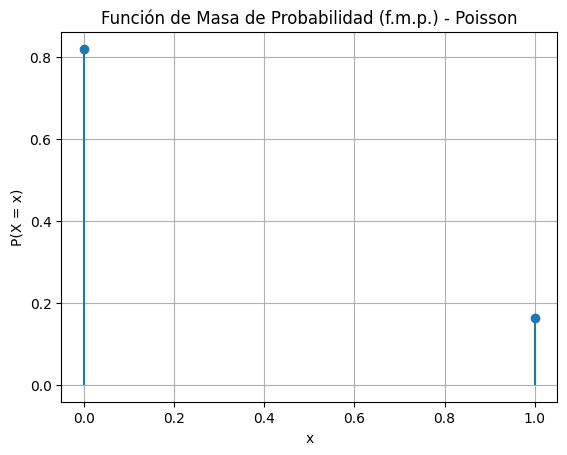

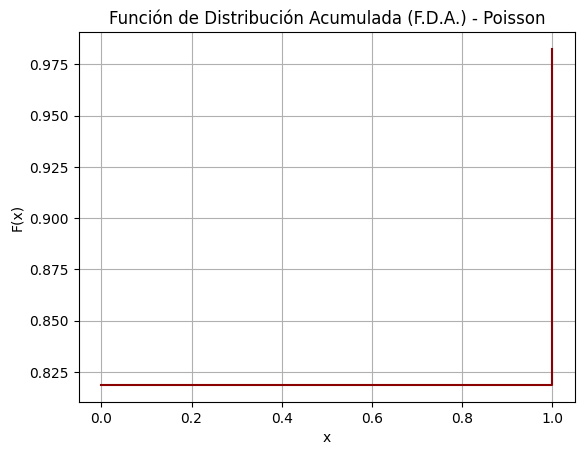

-----Clasificador de funciones-----
1. Continuas
2. Discretas
3. Salir


In [ ]:
 if __name__ == "__main__":
    main()